In [11]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

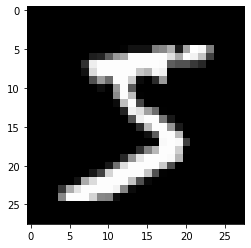

5


In [13]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [14]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [15]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [16]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [17]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 361s 6ms/step - loss: 4.6648 - acc: 0.6867 - val_loss: 0.1074 - val_acc: 0.9697
Epoch 2/3
60000/60000 [==============================] - 357s 6ms/step - loss: 0.0787 - acc: 0.9778 - val_loss: 0.0741 - val_acc: 0.9774
Epoch 3/3
60000/60000 [==============================] - 322s 5ms/step - loss: 0.0459 - acc: 0.9863 - val_loss: 0.0778 - val_acc: 0.9780


Prediction (Softmax) from the neural network:

 [[9.9999988e-01 1.1352658e-12 3.2437195e-09 1.3803646e-11 1.3207247e-12
  3.4062831e-12 9.0035250e-08 4.3631058e-12 2.7413294e-09 5.0898500e-08]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




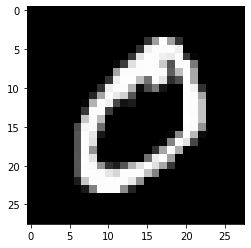



Final Output: 0


In [23]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))




----------------Contoured Image--------------------


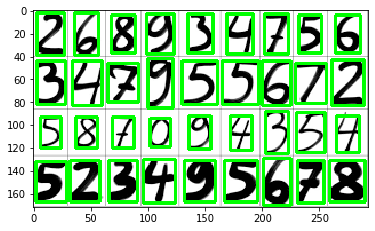

In [72]:
image = cv2.imread('test/example_05.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




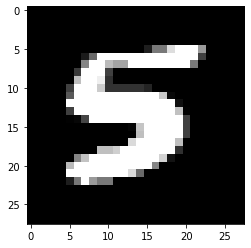



Final Output: 5

Prediction (Softmax) from the neural network:

 [[2.2675868e-18 1.3491594e-12 1.9331981e-15 6.0325432e-11 6.7483772e-14
  9.9999976e-01 3.0156141e-11 4.4433293e-10 2.5424796e-07 4.5758892e-08]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




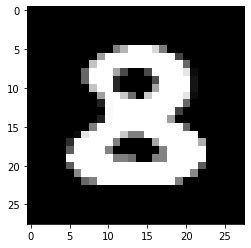



Final Output: 8

Prediction (Softmax) from the neural network:

 [[2.4740464e-07 4.5184665e-11 1.8275724e-06 8.4459379e-02 2.0516214e-13
  1.3347101e-09 3.0441271e-11 3.2749867e-10 9.1553575e-01 2.8874165e-06]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




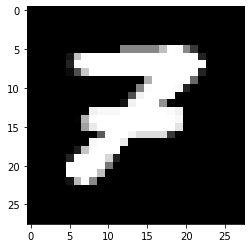



Final Output: 3

Prediction (Softmax) from the neural network:

 [[4.7030075e-17 9.2942924e-09 3.2166563e-02 9.6549201e-01 6.3657257e-07
  2.7500167e-11 4.8660714e-16 8.9963753e-04 2.4592635e-04 1.1951684e-03]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




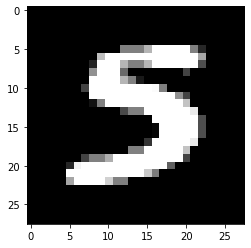



Final Output: 5

Prediction (Softmax) from the neural network:

 [[1.4241649e-09 3.0022323e-07 1.1347878e-06 5.8458172e-02 2.0167329e-08
  9.3200129e-01 8.4864036e-09 6.2673846e-03 4.4182008e-05 3.2275917e-03]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




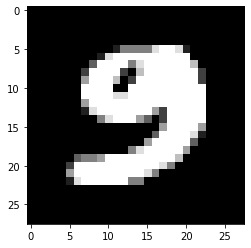



Final Output: 9

Prediction (Softmax) from the neural network:

 [[9.2342998e-07 3.3837342e-08 2.5187286e-09 3.2826286e-04 4.2144074e-10
  1.5214648e-07 1.4267946e-14 2.2287030e-07 9.8011787e-07 9.9966943e-01]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




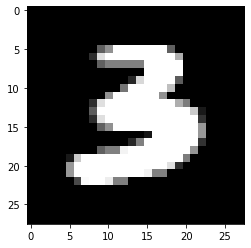



Final Output: 3

Prediction (Softmax) from the neural network:

 [[1.1983620e-10 3.4571398e-11 7.8768225e-10 9.9995720e-01 4.7380866e-10
  4.5898371e-08 5.5816133e-11 3.5555431e-08 4.1588162e-05 1.1978709e-06]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




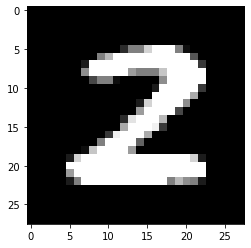



Final Output: 2

Prediction (Softmax) from the neural network:

 [[1.21430904e-11 8.62218796e-10 9.99989867e-01 5.93158074e-06
  7.39108377e-18 2.75908889e-17 4.14105275e-21 1.05914374e-10
  4.15561135e-06 2.60057448e-10]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




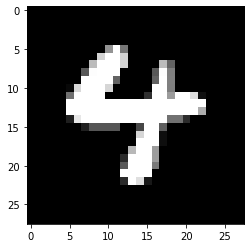



Final Output: 4

Prediction (Softmax) from the neural network:

 [[1.3192733e-15 4.0997861e-08 2.7206633e-12 9.8074793e-10 9.9987853e-01
  5.1643010e-08 1.8689370e-09 1.7365728e-10 9.1782262e-05 2.9710200e-05]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




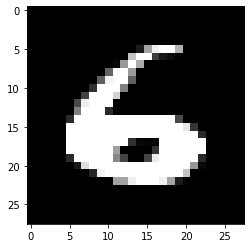



Final Output: 6

Prediction (Softmax) from the neural network:

 [[4.8235915e-11 2.2879410e-14 2.2912189e-08 1.8163044e-07 5.8840175e-07
  6.4086467e-05 9.9993503e-01 2.7855703e-14 9.5499701e-08 2.8398583e-08]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




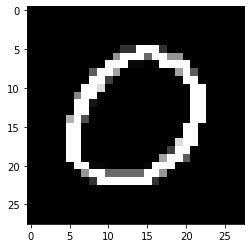



Final Output: 0

Prediction (Softmax) from the neural network:

 [[9.9999440e-01 2.6283817e-14 6.9041682e-11 1.6343942e-11 9.5786093e-20
  5.9774869e-15 2.7954803e-11 6.2762946e-13 2.0357142e-10 5.6262152e-06]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




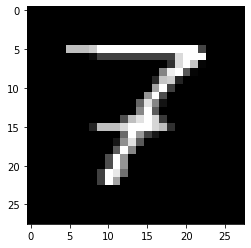



Final Output: 7

Prediction (Softmax) from the neural network:

 [[1.4048847e-11 3.7928753e-02 1.7906377e-01 8.1561424e-02 1.7641090e-03
  2.2938351e-04 2.3777535e-08 6.8205965e-01 8.2949232e-03 9.0979487e-03]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




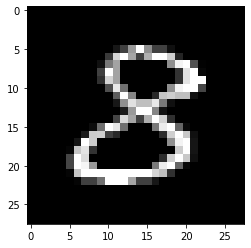



Final Output: 8

Prediction (Softmax) from the neural network:

 [[2.4412279e-14 8.5811329e-14 1.8605939e-12 4.2874468e-05 5.4063646e-19
  1.2515316e-07 1.8468251e-13 2.3257736e-10 9.9995685e-01 1.6778917e-07]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




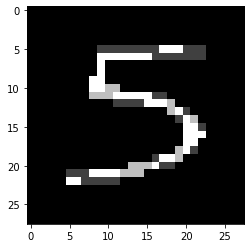



Final Output: 5

Prediction (Softmax) from the neural network:

 [[2.2405335e-11 1.4612427e-10 1.4452637e-09 2.8485610e-07 5.3655717e-15
  9.8727453e-01 2.3507507e-12 1.2724675e-02 5.9992965e-07 2.8436819e-08]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




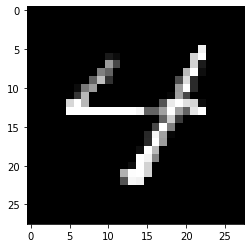



Final Output: 4

Prediction (Softmax) from the neural network:

 [[3.1554878e-13 2.6502471e-06 4.8477142e-11 2.2993234e-07 9.9978715e-01
  1.5616578e-04 5.4031283e-15 2.3223308e-07 4.8826019e-05 4.7788872e-06]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




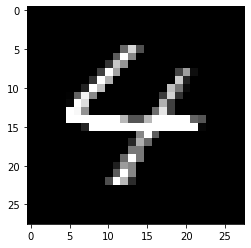



Final Output: 4

Prediction (Softmax) from the neural network:

 [[9.9663349e-21 1.9726250e-09 7.7333473e-09 2.7183683e-10 9.9999881e-01
  2.3402769e-09 6.6435355e-09 2.1209709e-07 2.5685614e-07 7.3836111e-07]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




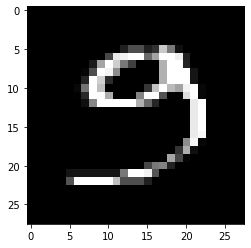



Final Output: 9

Prediction (Softmax) from the neural network:

 [[8.7057662e-05 2.0972983e-08 6.7075796e-08 3.3554359e-04 2.0634883e-11
  7.7687610e-06 6.9899192e-16 4.6854414e-08 3.6512898e-07 9.9956912e-01]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




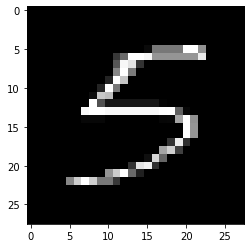



Final Output: 5

Prediction (Softmax) from the neural network:

 [[3.4977145e-13 2.6753078e-09 7.6252692e-13 5.3490428e-05 4.2071888e-09
  9.9923658e-01 2.4646539e-07 4.0491500e-08 1.5669356e-09 7.0965994e-04]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




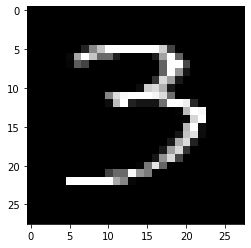



Final Output: 3

Prediction (Softmax) from the neural network:

 [[2.1713389e-09 2.6310386e-11 8.3216537e-06 9.9981302e-01 6.1270772e-14
  4.3482498e-09 5.2551035e-13 1.7755813e-04 2.4090385e-09 1.1052406e-06]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




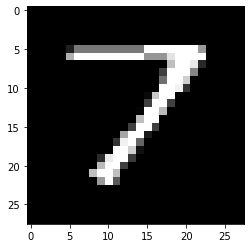



Final Output: 7

Prediction (Softmax) from the neural network:

 [[4.4247375e-12 1.0341588e-04 2.4550049e-02 3.9637447e-03 1.8684160e-07
  1.2566509e-09 7.6927257e-16 9.7095042e-01 3.6654482e-04 6.5658634e-05]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




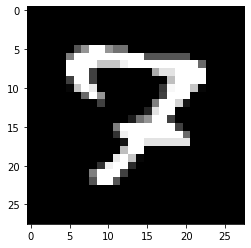



Final Output: 7

Prediction (Softmax) from the neural network:

 [[4.12675858e-18 1.51099376e-11 2.16196455e-07 2.03436448e-05
  1.02672634e-10 4.21706767e-12 2.73506933e-19 9.99963760e-01
  1.57117775e-05 9.51653079e-12]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




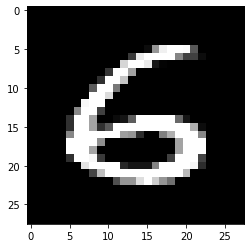



Final Output: 5

Prediction (Softmax) from the neural network:

 [[6.4662077e-06 5.8122396e-12 8.9000162e-07 2.6699288e-02 5.9222742e-09
  7.4514562e-01 2.2542858e-01 1.2720300e-12 7.7443721e-05 2.6416634e-03]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




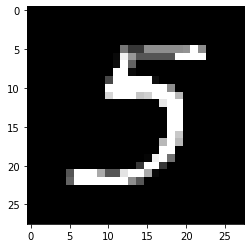



Final Output: 5

Prediction (Softmax) from the neural network:

 [[4.3020917e-10 1.3552692e-09 3.4792827e-15 5.0630234e-07 9.5398556e-14
  9.9989319e-01 3.1792151e-17 7.1901785e-10 2.0393670e-10 1.0629057e-04]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




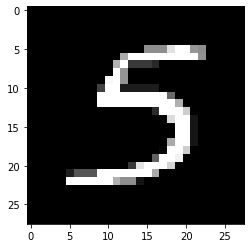



Final Output: 5

Prediction (Softmax) from the neural network:

 [[3.2365575e-11 6.6838246e-10 9.9724061e-17 1.0653170e-06 7.9788645e-16
  9.9998391e-01 1.4503155e-12 1.6089563e-10 4.6371433e-08 1.5040617e-05]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




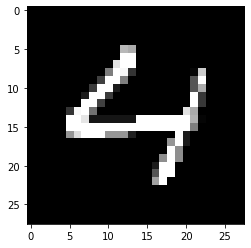



Final Output: 4

Prediction (Softmax) from the neural network:

 [[1.2639429e-18 9.0064187e-14 4.8655512e-15 7.6113551e-13 1.0000000e+00
  8.6307968e-14 4.5225703e-12 5.5522535e-13 7.1759901e-16 8.1413331e-12]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




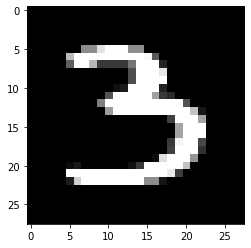



Final Output: 3

Prediction (Softmax) from the neural network:

 [[6.5722599e-16 1.3280079e-15 2.0186997e-15 1.0000000e+00 4.6373912e-17
  3.7683884e-10 1.1234841e-25 2.4956185e-13 1.3643375e-15 3.0102563e-09]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




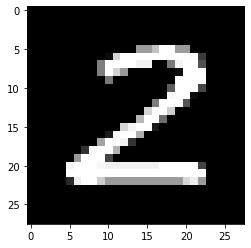



Final Output: 2

Prediction (Softmax) from the neural network:

 [[7.3362648e-14 5.3342140e-12 9.9999905e-01 3.6417680e-07 1.8893110e-19
  2.2255870e-16 2.2182317e-22 1.3710897e-12 6.4487301e-07 3.0621575e-13]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




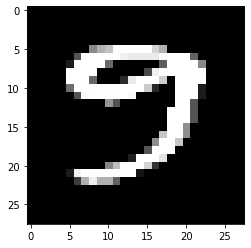



Final Output: 3

Prediction (Softmax) from the neural network:

 [[2.3343554e-01 4.4214300e-08 1.4435622e-04 5.7217324e-01 5.5119219e-14
  1.1394898e-06 1.9815782e-14 1.9359127e-01 9.7646307e-07 6.5340212e-04]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




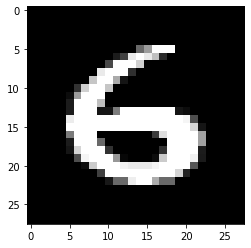



Final Output: 5

Prediction (Softmax) from the neural network:

 [[8.3893699e-12 1.7546804e-13 6.8348925e-14 4.4106062e-07 5.2952537e-10
  9.9926716e-01 7.1139232e-04 6.2204245e-15 2.7183231e-10 2.0931857e-05]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




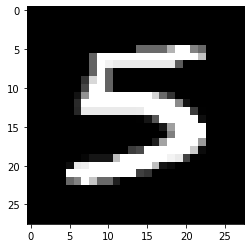



Final Output: 5

Prediction (Softmax) from the neural network:

 [[1.03722264e-19 3.67431389e-12 2.28225563e-16 1.04268261e-09
  5.10484710e-10 1.00000000e+00 1.24106654e-11 3.71961200e-08
  4.13567181e-10 1.75945070e-09]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




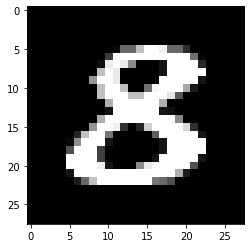



Final Output: 8

Prediction (Softmax) from the neural network:

 [[8.8240984e-11 3.1699299e-11 1.5119703e-08 1.9492515e-03 1.3453487e-12
  1.6594404e-07 6.0658678e-10 1.5581944e-10 9.9805057e-01 3.9303714e-08]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




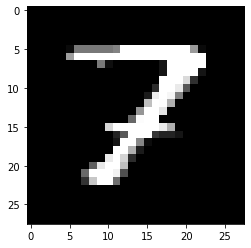



Final Output: 3

Prediction (Softmax) from the neural network:

 [[1.4985620e-12 3.1100692e-06 4.9740800e-05 9.8644906e-01 2.8025076e-07
  1.1351222e-09 1.4520384e-15 1.3042895e-02 5.6313443e-06 4.4938247e-04]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




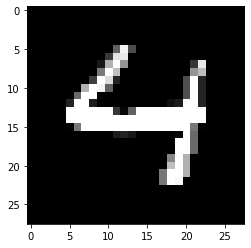



Final Output: 4

Prediction (Softmax) from the neural network:

 [[4.5772789e-19 2.2322087e-08 8.8182432e-15 2.4105644e-13 1.0000000e+00
  2.6999363e-09 3.8165779e-10 1.4561653e-12 2.6858973e-10 2.8548753e-08]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




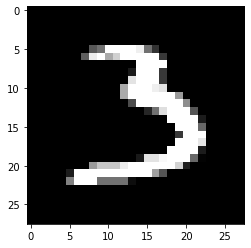



Final Output: 3

Prediction (Softmax) from the neural network:

 [[1.9204009e-09 3.8348286e-10 6.4356209e-09 9.9999833e-01 1.4650246e-12
  5.7492463e-07 1.5471751e-14 1.5513551e-08 6.9095701e-11 1.0694224e-06]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




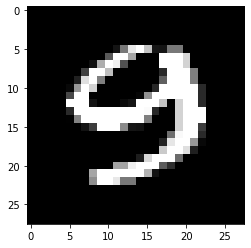



Final Output: 9

Prediction (Softmax) from the neural network:

 [[3.4133143e-12 5.2610227e-07 9.7045207e-09 1.8776313e-05 1.2753701e-08
  3.3883450e-06 3.8129743e-15 1.1132488e-08 3.9074703e-08 9.9997723e-01]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




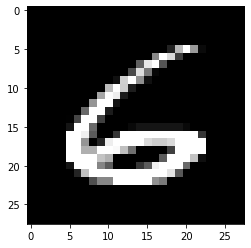



Final Output: 6

Prediction (Softmax) from the neural network:

 [[7.7779569e-06 9.4278019e-10 6.7525939e-06 7.2932119e-07 1.2244240e-09
  5.5625369e-06 9.9997568e-01 3.0083275e-10 3.3162912e-06 1.0792147e-07]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




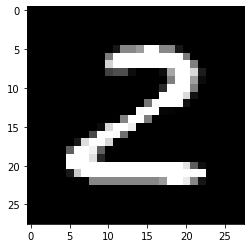



Final Output: 2

Prediction (Softmax) from the neural network:

 [[3.3206007e-12 1.2240993e-09 9.9982113e-01 1.7299560e-04 1.2075549e-18
  5.6436539e-12 2.6155211e-17 6.3409993e-12 5.9008034e-06 5.0418142e-11]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




In [73]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")